# Starting with Neural Networks : Basic classification

In [ ]:
try: 
    %tensorflow_version 2.x
except Exception: 
    pass

## Imports

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## TensorFlow version

In [ ]:
print(tf.__version__)

2.4.0


## Import dataset

In [ ]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

## Check the dataset

In [ ]:
cifar10_data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

## Split into training and testing set

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10_data

## Check content

In [ ]:
train_images[0]
train_images[0].shape

(32, 32, 3)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#train_labels = train_labels.ravel().tolist()
#train_labels = np.asarray([class_names[i] for i in train_labels])
#test_labels = test_labels.ravel().tolist()
#test_labels = np.asarray([class_names[i] for i in test_labels])

## Explore the data

In [ ]:
# Training set : 50 000 images of 32x32 px 
train_images.shape

(50000, 32, 32, 3)

In [ ]:
# Testing set : 10 000 images
test_images.shape

(10000, 32, 32, 3)

## Preprocess the data

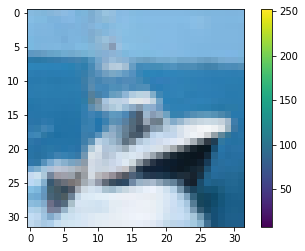

In [ ]:
i = 8

plt.figure()
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.show()

/opt/venv/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


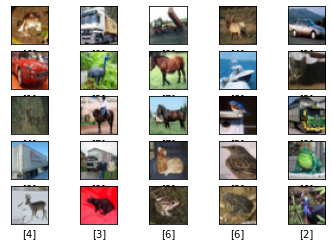

In [ ]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

## Normalize

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## First Neural Network 

In [ ]:
model = keras.Sequential ([
    keras.layers.Flatten(input_shape = (32 , 32 , 3)),
    keras.layers.Dense(128 , activation ='relu'),
    keras.layers.Dense(10 , activation ='softmax') ])


In [ ]:
model.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics= ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0079 - accuracy: 0.2806
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7827 - accuracy: 0.3611
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7094 - accuracy: 0.3890
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6585 - accuracy: 0.4077
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6242 - accuracy: 0.4191
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6085 - accuracy: 0.4220
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5948 - accuracy: 0.4279
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5756 - accuracy: 0.4370
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5785 - accuracy: 0.4356
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.561

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 1s - loss: 1.6017 - accuracy: 0.4270


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([0.02111067, 0.01226804, 0.07738706, 0.16956362, 0.03893054,
       0.1037432 , 0.23340267, 0.00138017, 0.34065706, 0.00155693],
      dtype=float32)

In [ ]:
predictions[:3]

array([[2.11106706e-02, 1.22680431e-02, 7.73870647e-02, 1.69563621e-01,
        3.89305428e-02, 1.03743196e-01, 2.33402669e-01, 1.38016965e-03,
        3.40657055e-01, 1.55692582e-03],
       [2.72306670e-02, 3.77179682e-01, 3.02785356e-03, 1.94225356e-03,
        1.01757108e-03, 6.24623790e-04, 5.83960267e-04, 8.43585178e-04,
        2.84128010e-01, 3.03421795e-01],
       [9.37426910e-02, 1.34062886e-01, 5.12804510e-03, 6.43606577e-03,
        1.22306868e-03, 3.03067686e-03, 3.10203555e-04, 1.25681877e-03,
        6.82212651e-01, 7.25969523e-02]], dtype=float32)

In [ ]:
(np.argmax(predictions[0]), np.argmax(predictions[1]), np.argmax(predictions[2]))

(8, 1, 8)

In [ ]:
(test_labels[0], test_labels[1], test_labels[2])

(array([3], dtype=uint8), array([8], dtype=uint8), array([8], dtype=uint8))

In [ ]:
def check_predict(index):
    success = 'red'
    a = np.argmax(predictions[index])
    proba = round(np.max(predictions[index])*100, 0)
    if  a == test_labels[index][0]:
        success = 'blue'
    plt.imshow(test_images[index])
    plt.xlabel(f"{class_names[a]} - {proba} % ({class_names[test_labels[index][0]]})", c = success)

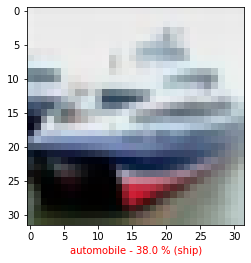

In [ ]:
check_predict(1)

## Ex 18 : 

In [ ]:
model.predict(tf.expand_dims(test_images[5], axis = 0))

array([[0.01309582, 0.00330777, 0.08261202, 0.13435033, 0.09525792,
        0.07763635, 0.54739875, 0.03486595, 0.00105687, 0.01041826]],
      dtype=float32)

## Ex 19 : à faire

In [ ]:
model = keras.Sequential ([
    keras.layers.Flatten(input_shape = (32 , 32 , 3)),
    keras.layers.Dense(128 , activation ='relu'),
    keras.layers.Dense(10 , activation ='softmax') ])


## Ex 20 : a faire aussi